In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df= pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [5]:
df.head()
print(df.shape)

(10000, 14)


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df.drop(columns=['RowNumber',	'CustomerId','Surname' ], inplace= True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df= pd.get_dummies(df,columns=['Geography',	'Gender'], drop_first= True)     #for one hot encoding - categorical to numerical

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [27]:
X=df.drop(columns=['Exited'])
y= df['Exited']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)

In [32]:
X_train.shape, y_train.shape

((8000, 11), (8000,))

In [39]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()



The StandardScaler from sklearn.preprocessing is used for standardizing data in machine learning. It transforms features to have a mean of 0 and a standard deviation of 1. This process is called z-score normalization.

In [40]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [41]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [42]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

1. import tensorflow: Loads TensorFlow, a powerful library for machine learning and deep learning.

2. from tensorflow import keras: Imports Keras, TensorFlow's high-level API for building and training deep learning models.
3. from tensorflow.keras import Sequential: Sequential is a simple way to stack layers in a neural network model, where each layer feeds into the next.
4. from tensorflow.keras.layers import Dense:Dense is a fully connected layer, where each neuron in the layer is connected to every neuron in the previous layer.
                   It is used to create the layers of the neural network.

In [58]:
model= Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(loss='binary_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

1. optimizer='Adam' :------Purpose: Specifies the optimization algorithm used to minimize the loss function. A widely used optimizer that combines the benefits of momentum and adaptive learning rates.
2. loss='binary_crossentropy' :----Purpose: Specifies the loss function that the model uses to measure its performance during training.
3. model.compile() function configures the neural network for training by specifying the loss function, optimizer, and optionally evaluation metrics.

In [76]:
history =model.fit(X_train_scaled, y_train, epochs= 100, validation_split=0.2) 

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.3144 - val_accuracy: 0.8512 - val_loss: 0.3451
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3056 - val_accuracy: 0.8525 - val_loss: 0.3439
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3214 - val_accuracy: 0.8537 - val_loss: 0.3411
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.3164 - val_accuracy: 0.8469 - val_loss: 0.3423
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3114 - val_accuracy: 0.8556 - val_loss: 0.3410
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.3128 - val_accuracy: 0.8531 - val_loss: 0.3432
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3140 - val_accuracy: 0.8525 - val_loss: 0.3421
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8609 - loss: 0.3296 - val_accu

In [72]:
model.layers[0].get_weights()

[array([[ 2.51479354e-02, -9.67447609e-02, -4.74146940e-03,
          6.64972886e-03,  6.36214018e-02,  1.28932044e-01,
          8.68799090e-02,  7.40347356e-02,  2.23459050e-01,
         -1.17532536e-01,  3.01382363e-01],
        [-2.89571304e-02, -8.00751820e-02, -1.01583719e+00,
          2.28243738e-01, -2.28189170e-01, -3.88748437e-01,
          4.04174119e-01, -5.83476186e-01,  8.76682326e-02,
          1.19659460e+00, -8.08626786e-02],
        [ 1.14989839e-02, -1.55437673e-02,  2.00997218e-01,
         -2.65739709e-01, -1.04062811e-01, -6.71437979e-02,
          4.57470357e-01, -2.28411764e-01,  1.90851718e-01,
         -1.00508071e-01, -6.03384376e-01],
        [ 7.65421748e-01,  7.86679566e-01,  1.78072825e-01,
          2.50639498e-01,  5.32002114e-02, -1.37598902e-01,
          4.74852622e-01, -5.37232794e-02,  2.17621610e-01,
         -1.76727369e-01, -5.29253483e-01],
        [ 9.66274366e-02,  7.44585216e-01, -1.63901411e-03,
          8.32985520e-01, -1.43406260e+00, -

In [73]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [74]:
y_pred =np.where(y_log> 0.5,1,0)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

86.5

things we can change to increase the accuracy score----
1. epochs, 
2. change in activation function,
3. increase the nodes of hidden layer
4. Increase the number of layers

In [77]:
import matplotlib.pyplot as plt

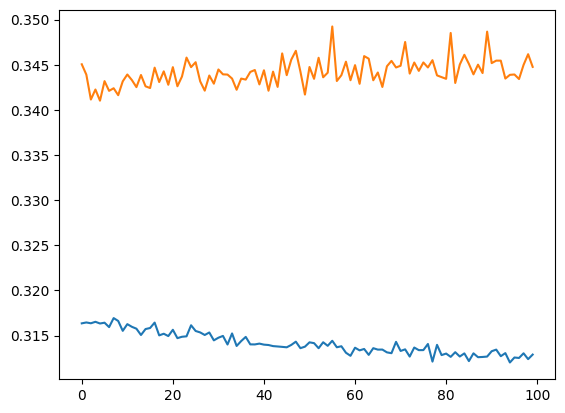

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

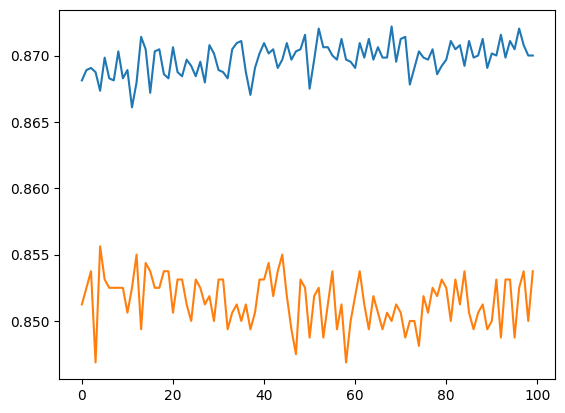

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])